In [2]:
from clnn3 import PlanarNeuralNetwork
from planar_utils import load_extra_datasets, plot_decision_boundary
import numpy as np
import matplotlib.pyplot as plt

# Load extra datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

# List of datasets (use only multiclass datasets)
datasets = [blobs, gaussian_quantiles]
dataset_names = ['Blobs', 'Gaussian Quantiles']



Cost after iteration 0: 2.0048497364788345
Cost after iteration 1000: 0.5722602405069545
Cost after iteration 2000: 0.4177483823774334
Cost after iteration 3000: 0.3580335962732043
Cost after iteration 4000: 0.32694835403587047
Cost after iteration 5000: 0.3078815601073909
Cost after iteration 6000: 0.2949388569400915
Cost after iteration 7000: 0.2855116164066972
Cost after iteration 8000: 0.2782625643656243
Cost after iteration 9000: 0.27243319959348145


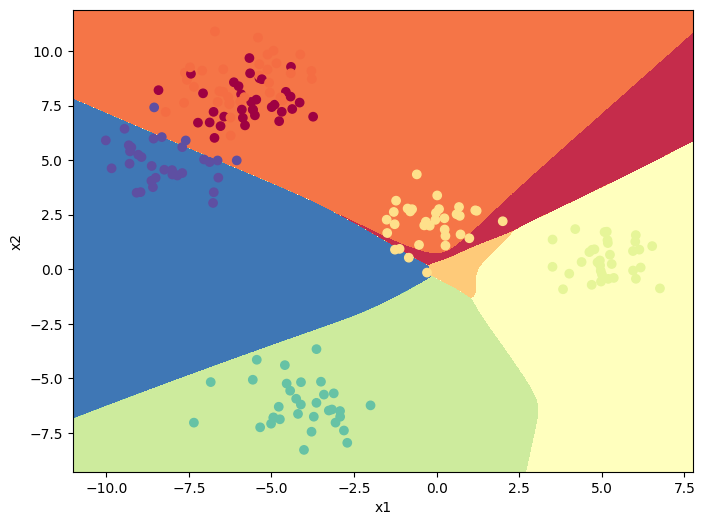

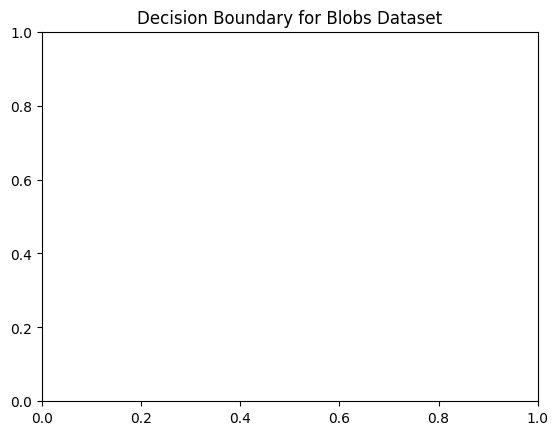

Accuracy for Blobs dataset: 64.00%

Cost after iteration 0: 0.8764464182165962
Cost after iteration 1000: 0.5384245113486802
Cost after iteration 2000: 0.42538605807759267
Cost after iteration 3000: 0.3486869159216778
Cost after iteration 4000: 0.29621819561716045
Cost after iteration 5000: 0.2589417840649138
Cost after iteration 6000: 0.23201451428466996
Cost after iteration 7000: 0.2122128628810943
Cost after iteration 8000: 0.19699057187066932
Cost after iteration 9000: 0.18474441595923427


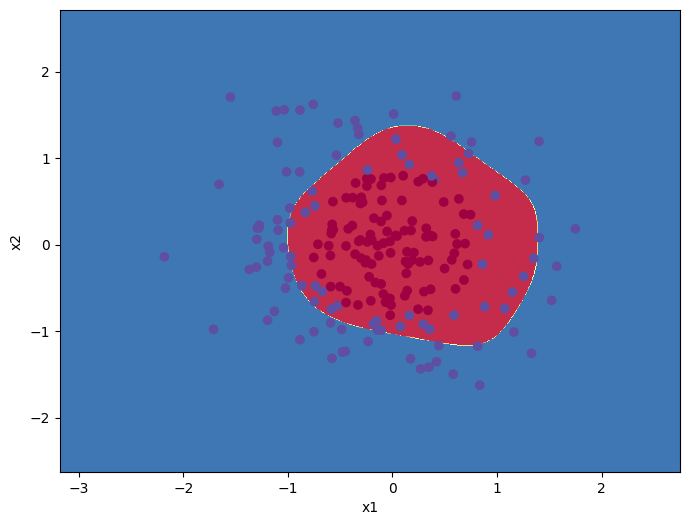

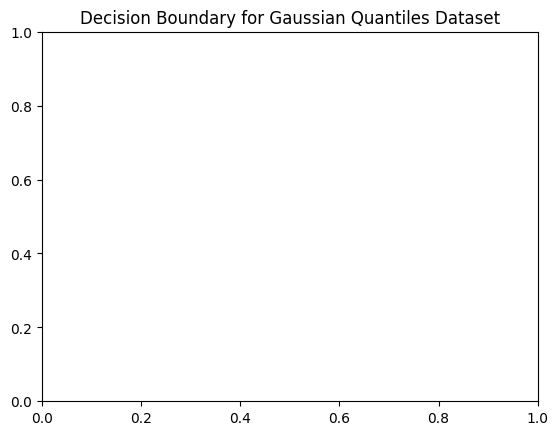

Accuracy for Gaussian Quantiles dataset: 80.50%



In [3]:
# Iterate through datasets
for data, name in zip(datasets, dataset_names):
    X, Y = data
    X, Y = X.T, Y.reshape(1, Y.size)
    
    # Get the number of classes
    n_classes = len(np.unique(Y))
    
    # Create and train the neural network
    nn = PlanarNeuralNetwork(n_x=2, n_h=10, n_y=n_classes)
    nn.train(X, np.eye(n_classes)[Y.squeeze()].T, num_iterations=10000, print_cost=True)
    
    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    plot_decision_boundary(nn, X, Y)
    plt.title(f'Decision Boundary for {name} Dataset')
    plt.show()
    
    # Print accuracy
    predictions = nn.predict(X)
    accuracy = np.mean(predictions == Y.squeeze())
    print(f'Accuracy for {name} dataset: {accuracy * 100:.2f}%\n')
